# Hypo 3: Credit limit determination

### In this Hypo, I applied Lasso, Ridge Regression to predict credit limit.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#machine learning-classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error

In [3]:
#ML- regression
from sklearn.linear_model import Lasso, Ridge

## Part I: Import Data and preprocessing Data

In [4]:
df = pd.read_csv('default of credit card clients.csv')
df = df.iloc[1:,1:]
df = df.astype(int)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,230000,2,6,2,46,0,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
2,30000,1,6,1,53,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,360000,1,6,1,66,-1,-1,-1,-1,-1,...,151858,48580,1451,75351,4064,152618,48822,1451,171944,0
4,270000,1,6,2,32,-2,-2,-2,-2,-2,...,40359,51264,34874,52398,27787,40569,53500,35051,120391,0
5,90000,2,6,2,49,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,11135,0


In [27]:
df.shape

(30000, 24)

In [28]:
colnames = list(range(1,5)) + list(range(11, 23))
X = df.iloc[:, colnames]
X = X[((df.X3 == 1) | (df.X3 == 2) | (df.X3 == 3)) & ((df.X4 == 1) | (df.X4 == 2))]
y = df.X1[((df.X3 == 1) | (df.X3 == 2) | (df.X3 == 3)) & ((df.X4 == 1) | (df.X4 == 2))]

In [29]:
X.X4.unique()

array([1, 2], dtype=int64)

In [30]:
X.X3.unique()

array([3, 2, 1], dtype=int64)

In [31]:
X.shape

(29163, 16)

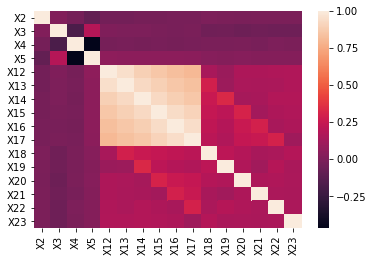

In [32]:
sns.heatmap(X.corr())

In [33]:
X = pd.get_dummies(X,columns=['X2', 'X3', 'X4'], drop_first = True)

## Part II: Model Training and Result Evaluation

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Lasso
Regressor_Lasso = Lasso()
#Reidge
Regressor_Ridge = Ridge()

# train the model with lasso
Regressor_Lasso.fit(X_train, y_train)
#train the model with Ridge
Regressor_Ridge.fit(X_train, y_train)

#calculate MSE
y_pred = Regressor_Lasso.predict(X_test)
mean_squared_error(y_test,y_pred)

11975296002.115818

### Model I: Lasso Regression

In [35]:
Regressor_Lasso.coef_[1]

37258.75308939375

[Text(0, 0, 'X17'),
 Text(0, 0, 'X2_2'),
 Text(0, 0, 'X20'),
 Text(0, 0, 'X16'),
 Text(0, 0, 'X4_2'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X21'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X22'),
 Text(0, 0, 'X23'),
 Text(0, 0, 'X15'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X14'),
 Text(0, 0, 'X3_2'),
 Text(0, 0, 'X3_3'),
 Text(0, 0, 'X12')]

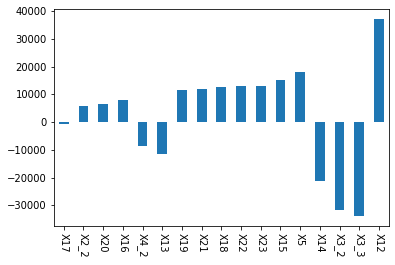

In [36]:
top_idx = list(np.argsort(np.abs(Regressor_Lasso.coef_))[:])  #argsort: 从小到大
bplot = pd.Series(Regressor_Lasso.coef_[top_idx])
selected_features = pd.Series(X.columns)
xticks = selected_features[top_idx]
p2 = bplot.plot(kind='bar',rot=-90)
p2.set_xticklabels(xticks)

### Higher credit limit: older people, pay more, married, graduate school, female

### Model II: Ridge Regression

In [37]:
Regressor_Ridge.coef_

array([ 18141.28795694,  37256.35181901, -11440.29980817, -21114.31634254,
        15049.66503662,   7868.68276948,   -890.83141601,  12436.38497393,
        11574.38335457,   6652.08259517,  11955.23827897,  12867.95232171,
        12970.89690884,   5727.3363459 , -31581.66293536, -33975.30694862,
        -8658.82847139])

[Text(0, 0, 'X2_2'),
 Text(0, 0, 'X20'),
 Text(0, 0, 'X16'),
 Text(0, 0, 'X4_2'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X21'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X22'),
 Text(0, 0, 'X23'),
 Text(0, 0, 'X15'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X14'),
 Text(0, 0, 'X3_2'),
 Text(0, 0, 'X3_3'),
 Text(0, 0, 'X12')]

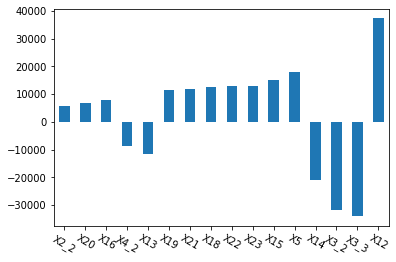

In [38]:
top_idx = list(np.argsort(np.abs(Regressor_Ridge.coef_))[-16:])  
bplot = pd.Series(Regressor_Ridge.coef_[top_idx])
selected_features = pd.Series(X.columns)
xticks = selected_features[top_idx]
p2 = bplot.plot(kind='bar',rot=-30)
p2.set_xticklabels(xticks)

### the same results with Lasso

### Conclusion: older people, pay more, married, graduate school, female should have higher credit limit